In [1309]:

import json
# Calculate the Euclidean distance
# between two points
from functools import reduce
from textwrap import wrap

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


def distance_2d(x1, y1, x2, y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** (1 / 2)


# Function to calculate K closest points
def kClosest(points, target, K):
    pts = []
    position = []
    dist = []
    n = len(points)
    d = []

    for i in range(n):
        d.append({
            "first": distance_2d(points[i][0], points[i][1], target[0], target[1]),
            "second": i
        })

    d = sorted(d, key=lambda l: l["first"])

    for i in range(K):
        pt = []
        dist.append(d[i]["first"])
        position.append(d[i]["second"])
        pt.append(points[d[i]["second"]][0])
        pt.append(points[d[i]["second"]][1])
        pts.append(pt)

    return dict(zip(position, dist))






In [1310]:

# Function to calculate K closest points
from scipy.spatial import distance


def kClosest_high(points, target, K):
    pts = []
    position = []
    dist = []
    n = len(points)
    d = []

    for i in range(n):
        d.append({
            "first": distance.cosine(points[i], target),
            "second": i
        })

    d = sorted(d, key=lambda l: l["first"])

    pt = []
    for i in range(K):
        dist.append(d[i]["first"])
        position.append(d[i]["second"])
        # pt.append(points[d[i]["second"]])
    return dict(zip(position, dist))

In [1346]:



def load_points(model, article, k):
    f = open(f'../embeddings/high_dimension/{model}_high_dim.json')
    data = json.load(f)
    target = data[article]
    articles_title = list(data.keys())
    corpus_embedding = list(data.values())
    # target_index = articles_title.index(article)

    # umap_embeddings = UMAP(n_neighbors=5, n_components=2, metric='cosine', random_state=22)
    # low_dim_embeddings = umap_embeddings.fit_transform(corpus_embedding)
    #
    # corpus_embedding = low_dim_embeddings.tolist()
    # target = corpus_embedding[target_index]

    closest_points = kClosest_high(corpus_embedding, target, k)
    near_values = {}
    for k in closest_points.keys():
        # if closest_points[k] != 0:
        near_values[articles_title[k]] = closest_points[k]
    return near_values

In [1347]:
def draw_plot(target_title, K):
    # models = ['all_mpnet_base_v2', 'allenai_specter', 'biowordvec',
    #           'generic_fasttext']
    # model_names = ['all-mpnet-base-v2', 'allenai-specter', 'BioWordVec',
    #                'Generic fastText']
    # models = ['all_mpnet_base_v2', 'allenai_specter', 'pubmedbert', 'biowordvec', 'generic_fasttext', 'tfidf', 'bow']
    # model_names = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBERT', 'Avg. BioWordVec', 'Avg. Generic fastText',
    #                'TFIDF', 'BOW']
    # models = ['biowordvec', 'generic_fasttext']

    models = ['all_mpnet_base_v2', 'allenai_specter']
    model_names = ['all-mpnet-base-v2', 'allenai-specter']
    # model_names = ['allenai_specter', 'pubmedbert', 'generic_fasttext']
    # models = ['allenai_specter', 'pubmedbert', 'generic_fasttext']

    all_points = {model: load_points(model, target_title, k=236) for model in models}
    points = {model: load_points(model, target_title, k=K) for model in models}

    # print(len(points))
    allkey = reduce(set.union, map(set, map(dict.keys, points.values())))
    if target_title in allkey:
        allkey.remove(target_title)

    d = np.zeros((len(allkey), len(models)))
    all_dist = []
    index_a = []
    for key in allkey:
        print(key)
        item = [points[m][key] if key in points[m] else all_points[m][key] for m in models]
        a = [list(points[m].keys()).index(key) if key in points[m] else list(all_points[m].keys()).index(key) for m in
             models]
        index_a.append(a)
        all_dist.append(item)

    A = np.array(all_dist)
    B = np.array(index_a)
    avg = np.average(A, axis=0)

    labels = ['\n'.join(wrap(l, 30)) for l in allkey]
    fig, ax = plt.subplots(figsize=(6, 8))
    # my_colors = ['#08c45b', '#eded72', '#926dd1']
    my_colors = ['#08c45b', '#eded72']
    my_cmap = ListedColormap(my_colors)
    my_cmap.set_over('#eb4f34')
    ax = sns.heatmap(B, xticklabels=model_names, yticklabels=labels, annot=A,
                     cbar_kws={'label': 'Publication Ranks',
                               'extend': 'max',
                               'ticks': [2, 4]},
                     cmap=my_cmap, vmin=1, vmax=4, cbar=True, ax=ax,
                     annot_kws={'fontsize': 12, 'color': 'black', 'alpha': 1}, linewidths=0.08,
                     linecolor='lightgray',
                     fmt='.4f')
    # ax = sns.heatmap(B, mask=B < 2, cmap='Blues', annot=A,xticklabels=models, yticklabels=allkey, vmin=0, vmax=1, cbar=False, ax=ax)
    colorbar = ax.collections[0].colorbar
    # colorbar.set_ticks(np.linspace(1, 1, 4))

    colorbar.set_ticks([2.5, 4])
    colorbar.set_ticklabels(['2', '4'])
    plt.title(label=f'Distance from \"{target_title}\"', fontsize=10, fontstyle='oblique')
    plt.show()
    return B

Guided Visualization of Ultrasound Image Sequences
Computation and Visualization of Asynchronous Behavior of the Heart
HIFUpm: a Visual Environment to Plan and Monitor High Intensity Focused Ultrasound Treatments
Visual Analysis of Regional Anomalies in Myocardial Motion
Exploration of Interventricular Septum Motion in Multi-Cycle Cardiac MRI


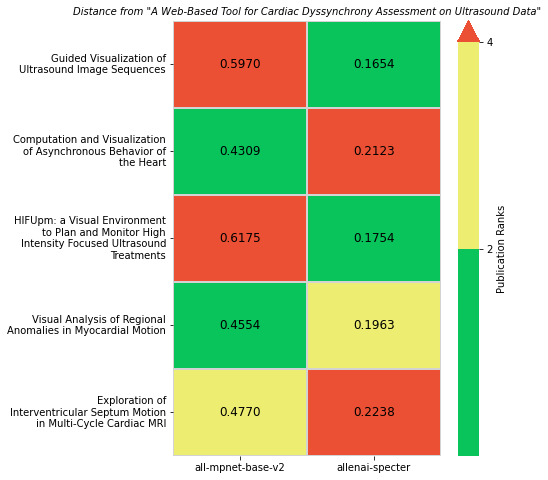

array([[19,  1],
       [ 1, 13],
       [28,  2],
       [ 2,  3],
       [ 3, 23]])

In [1348]:
import numpy as np

target_title1 = "A Web-Based Tool for Cardiac Dyssynchrony Assessment on Ultrasound Data"
B = draw_plot(target_title1, 4)
B = np.array(B)
B

In [1349]:
import torch
import torch.nn.functional as F


def calculate_dist(model, paper, target):
    f = open(f'../embeddings/high_dimension/{model}_high_dim.json')
    data = json.load(f)

    target_emb = data[target]
    paper_emb = data[paper]
    dist = distance.cosine(target_emb, paper_emb)
    a = torch.FloatTensor(paper_emb)

    b = torch.FloatTensor(target_emb)
    result = F.cosine_similarity(a, b, dim=0)
    return result



In [1350]:
model = "allenai_specter"
target = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
paper1 = "PATHONE: From one Thousand Patients to one Cell"
dist = calculate_dist(model, paper1, target)
dist

tensor(0.9016)

In [1351]:
with open('../articles_data/all_articles_with_thumbnail_metadata.json') as f:
    papers = json.load(f)

article_titles = [paper['article_title'] for paper in papers]

In [1352]:
with open('../articles_data/all_articles_with_thumbnail_metadata.json') as f:
    papers = json.load(f)

article_titles = [paper['article_title'] for paper in papers]

In [1370]:
def create_rank_matrix(target_title, K, drawplot=False):
    # models = ['allenai_specter','all_mpnet_base_v2','biowordvec',
    #           'generic_fasttext', 'TFIDF', 'BOW']
    # model_names = ['allenai_specter','all_mpnet_base_v2','BioWordVec',
    #           'Generic fastText','TFIDF','BOW']

    # model_names = ['BioWordVec','Generic fastText']
    models = ['allenai_specter', 'all_mpnet_base_v2', 'pubmedbert', 'generic_fasttext']
    model_names = ['allenai-specter', 'all-mpnet-base-v2', 'PubMedBERT', 'Avg. Generic fastText']

    all_points = {model: load_points(model, target_title, k=236) for model in models}
    points = {model: load_points(model, target_title, k=K) for model in models}

    # print(len(points))
    allkey = reduce(set.union, map(set, map(dict.keys, points.values())))
    if target_title in allkey:
        allkey.remove(target_title)

    d = np.zeros((len(allkey), len(models)))
    all_dist = []
    index_a = []
    for key in allkey:
        item = [points[m][key] if key in points[m] else all_points[m][key] for m in models]
        a = [list(points[m].keys()).index(key) if key in points[m] else list(all_points[m].keys()).index(key) for m in
             models]
        index_a.append(a)
        all_dist.append(item)

    A = np.array(all_dist)
    B = np.array(index_a)

    avg = np.average(A, axis=0)

    labels = ['\n'.join(wrap(l, 40)) for l in allkey]
    # my_colors = ['#08c45b', '#eded72','#926dd1','#6f6dd1', '#bf62b7']
    my_colors = ['#08c45b', '#eded72', '#87ceeb']
    my_cmap = ListedColormap(my_colors)
    my_cmap.set_over('#eb4f34')
    if drawplot:
        print(allkey)
        fig, ax = plt.subplots(figsize=(6, 8))
        ax = sns.heatmap(B, xticklabels=model_names, yticklabels=labels, annot=A,
                         cbar_kws={'label': 'Publication Ranks',
                                   'extend': 'max',
                                   'ticks': [1, 2, 3]},
                         cmap=my_cmap, vmin=1, vmax=3, cbar=True, ax=ax,
                         annot_kws={'fontsize': 12, 'color': 'black', 'alpha': 1}, linewidths=0.08,
                         linecolor='lightgray', fmt='.4f')
        # colorbar = ax.collections[0].colorbar
        # colorbar.set_ticks([2.5, 4])
        # colorbar.set_ticklabels(['2', '4'])
        plt.title(label=f'Distance from \"{target_title}\"', fontsize=10, fontstyle='oblique')
        plt.show()
    return B

{'Visualization-Guided Evaluation of Simulated Minimally Invasive Cancer Treatment', 'Adapted Surface Visualization of Cerebral Aneurysms with Embedded Blood Flow Information', 'A Critical Analysis of the Evaluation Practice in Medical Visualization', 'RegistrationShop: An Interactive 3D Medical Volume Registration System', 'Tractography in Context: Multimodal Visualization of Probabilistic Tractograms in Anatomical Context', 'Visual Analysis of Multivariate Intensive Care Surveillance Data', 'From Imprecise User Input to Precise Vessel Segmentations', 'Automatic Generation of Web-Based User Studies to Evaluate Depth Perception in Vascular Surface Visualizations'}


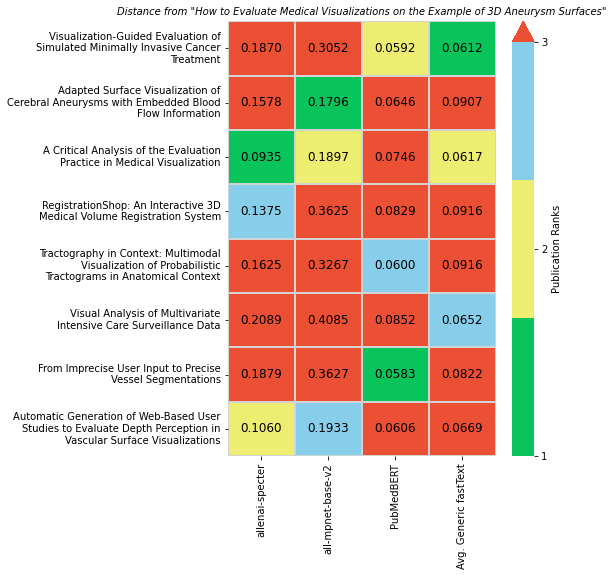

array([[21, 11,  2,  1],
       [ 6,  1,  7, 42],
       [ 1,  2, 33,  2],
       [ 3, 24, 79, 45],
       [ 8, 18,  3, 44],
       [36, 50, 92,  3],
       [24, 25,  1, 23],
       [ 2,  3,  5,  4]])

In [1372]:
target_title1 = "How to Evaluate Medical Visualizations on the Example of 3D Aneurysm Surfaces"
B = create_rank_matrix(target_title1, 4, True)
B

In [1345]:
# import pandas as pd

# target_title1 = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# target_title2 = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
# article = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# A, B = draw_plot(article)

# draw_plot(target_title2)
# models = ['all-mpnet-base-v2', 'allenai-specter', 'BioBERT', 'PubMedBert', 'BioWordVec',
#           'Generic fastText']
# rank_matrix = []
# dist_matrix = []
# count = 0
# all_cor_mat = []
# all_dist_mat = []
# # draw_plot(target_title3)
# for article in article_titles:
#     B = create_rank_matrix(article, K=5)
#     # x = A.mean(axis=0)
#     # all_dist_mat.append(x)
#     df = pd.DataFrame(B)
#     cor_B = df.corr(method="spearman")
#     all_cor_mat.append(cor_B)


#     dist_matrix.append(A)
#     rank_matrix.append(B)

In [659]:
# x = np.array(all_dist_mat).mean(axis=0)
# x

In [660]:
# all_cor_mat = np.array(all_cor_mat)
# x = np.mean(all_cor_mat, axis=0)
# y = pd.DataFrame(x, columns=['all-mpnet-base-v2', 'allenai-specter', 'BioBERT', 'PubMedBert', 'BioWordVec',
#                              'Generic fastText'])
# sns.heatmap(y, cmap="coolwarm", mask=np.triu(y), yticklabels=models, annot=y)



In [661]:
# import pandas as pd
#
# df = pd.DataFrame(B, columns=['all_mpnet', 'allenai', 'biowordvec', 'generic_fast'])
# my_r = df.corr(method="spearman")
# fig, ax = plt.subplots(figsize=(6, 6))
# sns.heatmap(my_r, cmap="coolwarm", mask=np.triu(my_r))

In [662]:
# import pandas as pd
#
# df = pd.DataFrame(B, columns=['all_mpnet', 'allenai', 'biobert', 'pubmedbert', 'biowordvec', 'generic_fast', 'tfidf',
#                               'bow'])
# my_r = df.corr(method="spearman")
# fig, ax = plt.subplots(figsize=(6, 6))
# sns.heatmap(my_r, cmap="coolwarm", mask=np.triu(my_r))

In [663]:
# a = np.array(8)
# A = np.append(a, B)
# A

In [664]:
# import pandas as pd
#
# df = pd.DataFrame(B, columns=['all_mpnet', 'allenai', 'biobert', 'pubmedbert', 'biowordvec', 'generic_fast'])
# my_r = df.corr(method="spearman")
# fig, ax = plt.subplots(figsize=(6, 6))
# sns.heatmap(my_r, cmap="coolwarm", mask=np.triu(my_r))

In [918]:
def kClosest_high(points, target, K):
    pts = []
    position = []
    dist = []
    n = len(points)
    d = []

    for i in range(n):
        d.append({
            "first": distance.cosine(points[i], target),
            "second": i
        })

    d = sorted(d, key=lambda l: l["first"])

    pt = []
    for i in range(K):
        dist.append(d[i]["first"])
        position.append(d[i]["second"])
        # pt.append(points[d[i]["second"]])
    return dict(zip(position, dist))

In [919]:
def load_points(model, article, k):
    f = open(f'../embeddings/high_dimension/{model}_high_dim.json')
    data = json.load(f)
    target = data[article]
    articles_title = list(data.keys())
    corpus_embedding = list(data.values())
    closest_points = kClosest_high(corpus_embedding, target, k)
    near_values = {}
    for k in closest_points.keys():
        if closest_points[k] != 0:
            near_values[articles_title[k]] = closest_points[k]
    return near_values

In [920]:
def generate_rank_matrix(target_title, K, drawplot=False):
    models = ['allenai_specter', 'all_mpnet_base_v2', 'pubmedbert', 'biowordvec',
              'generic_fasttext', 'tfidf', 'bow']
    model_names = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBERT', 'Avg. BioWordVec',
                   'Avg. Generic fastText', 'TFIDF', 'BOW']
    # models = ['biowordvec','generic_fasttext']
    # model_names = ['BioWordVec','Generic fastText']
    # models = ['allenai_specter','all_mpnet_base_v2']
    # model_names = ['allenai_specter','all_mpnet_base_v2']

    all_points = {model: load_points(model, target_title, k=236) for model in models}
    points = {model: load_points(model, target_title, k=K) for model in models}

    articles_from_models = [r for x in list(points.values()) for r in x]

    # print(len(points))
    allkey = reduce(set.union, map(set, map(dict.keys, points.values())))
    # if target_title in articles_from_models:
    #     articles_from_models.remove(target_title)

    d = np.zeros((len(allkey), len(models)))
    all_dist = []
    index_a = []
    for key in articles_from_models:
        item = [points[m][key] if key in points[m] else all_points[m][key] for m in models]
        a = [list(points[m].keys()).index(key) if key in points[m] else list(all_points[m].keys()).index(key) for m in
             models]
        index_a.append(a)
        all_dist.append(item)

    A = np.array(all_dist)
    B = np.array(index_a)

    avg = np.average(A, axis=0)

    labels = ['\n'.join(wrap(l, 50)) for l in articles_from_models]
    my_colors = ['#08c45b']
    my_cmap = ListedColormap(my_colors)
    my_cmap.set_over('#eb4f34')
    if drawplot:
        fig, ax = plt.subplots(figsize=(6, 6))
        ax = sns.heatmap(B, xticklabels=model_names, yticklabels=labels, annot=A,
                         cbar_kws={'label': 'Publication Ranks',
                                   'extend': 'max',
                                   'ticks': [1, 2]},
                         cmap=my_cmap, vmin=1, vmax=2, cbar=True, ax=ax,
                         annot_kws={'fontsize': 12, 'color': 'black', 'alpha': 1}, linewidths=0.08,
                         linecolor='lightgray')
        colorbar = ax.collections[0].colorbar
        colorbar.set_ticks([1, 2])
        colorbar.set_ticklabels(['1', '2'])
        plt.title(label=f'Distance from \"{target_title}\"', fontsize=10, fontstyle='oblique')
        plt.show()
    return B

In [922]:
import pandas as pd

# target_title1 = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# target_title2 = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
# article = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# A, B = draw_plot(article)

# draw_plot(target_title2)
models = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
          'Avg. Generic fastText', 'TFIDF', 'BOW']
model_names = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBERT', 'Avg. BioWordVec',
               'Avg. Generic fastText', 'TFIDF', 'BOW']
rank_matrix = []
dist_matrix = []
count = 0
all_mat = []
all_dist_mat = []
# draw_plot(target_title3)
for article in article_titles:
    B = generate_rank_matrix(article, K=6, drawplot=False)
    df_x = pd.DataFrame(B)
    my_r = df_x.corr(method="spearman")
    all_mat.append(my_r)

In [923]:
all_mat

[          0         1         2         3         4         5         6
 0  1.000000  0.642706 -0.156281  0.206639  0.120551 -0.060065 -0.185258
 1  0.642706  1.000000 -0.057814  0.425798  0.503165 -0.359404 -0.431144
 2 -0.156281 -0.057814  1.000000  0.071037  0.151498 -0.285976 -0.241806
 3  0.206639  0.425798  0.071037  1.000000  0.729638 -0.261500 -0.262062
 4  0.120551  0.503165  0.151498  0.729638  1.000000 -0.331270 -0.223519
 5 -0.060065 -0.359404 -0.285976 -0.261500 -0.331270  1.000000  0.938107
 6 -0.185258 -0.431144 -0.241806 -0.262062 -0.223519  0.938107  1.000000,
           0         1         2         3         4         5         6
 0  1.000000  0.762984 -0.361858  0.033638 -0.104856  0.190429 -0.120338
 1  0.762984  1.000000 -0.591555  0.159465  0.033075  0.484588  0.216327
 2 -0.361858 -0.591555  1.000000 -0.343279 -0.082055 -0.289796 -0.317664
 3  0.033638  0.159465 -0.343279  1.000000  0.636594 -0.036453  0.204785
 4 -0.104856  0.033075 -0.082055  0.636594  1.0000

In [915]:

R_mean = np.median(all_mat, axis=0)
R = R_mean
R
# new_mat = []
# for i in all_mat:
#     i = np.subtract(R_mean, i)
#     new_mat.append(i)

# new_mat_sorted = np.sort(all_mat, axis=0)
# new_mat_sorted



array([[ 1.        ,  0.64270643, -0.15628077,  0.20663947,  0.12055141,
        -0.06006471, -0.18525812],
       [ 0.64270643,  1.        , -0.05781404,  0.42579828,  0.503165  ,
        -0.35940357, -0.43114362],
       [-0.15628077, -0.05781404,  1.        ,  0.07103671,  0.1514981 ,
        -0.28597552, -0.24180616],
       [ 0.20663947,  0.42579828,  0.07103671,  1.        ,  0.72963849,
        -0.26149951, -0.26206217],
       [ 0.12055141,  0.503165  ,  0.1514981 ,  0.72963849,  1.        ,
        -0.33127022, -0.22351948],
       [-0.06006471, -0.35940357, -0.28597552, -0.26149951, -0.33127022,
         1.        ,  0.93810663],
       [-0.18525812, -0.43114362, -0.24180616, -0.26206217, -0.22351948,
         0.93810663,  1.        ]])

[[        nan  0.64270643 -0.15628077  0.20663947  0.12055141 -0.06006471
  -0.18525812]
 [ 0.64270643         nan -0.05781404  0.42579828  0.503165   -0.35940357
  -0.43114362]
 [-0.15628077 -0.05781404         nan  0.07103671  0.1514981  -0.28597552
  -0.24180616]
 [ 0.20663947  0.42579828  0.07103671         nan  0.72963849 -0.26149951
  -0.26206217]
 [ 0.12055141  0.503165    0.1514981   0.72963849         nan -0.33127022
  -0.22351948]
 [-0.06006471 -0.35940357 -0.28597552 -0.26149951 -0.33127022         nan
   0.93810663]
 [-0.18525812 -0.43114362 -0.24180616 -0.26206217 -0.22351948  0.93810663
          nan]]
[[        nan  0.64270643 -0.15628077  0.20663947  0.12055141 -0.06006471
  -0.18525812]
 [ 0.64270643         nan -0.05781404  0.42579828  0.503165   -0.35940357
  -0.43114362]
 [-0.15628077 -0.05781404         nan  0.07103671  0.1514981  -0.28597552
  -0.24180616]
 [ 0.20663947  0.42579828  0.07103671         nan  0.72963849 -0.26149951
  -0.26206217]
 [ 0.12055141  0.503

/Users/prush/opt/miniconda3/envs/newpy/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Users/prush/opt/miniconda3/envs/newpy/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


<AxesSubplot:>

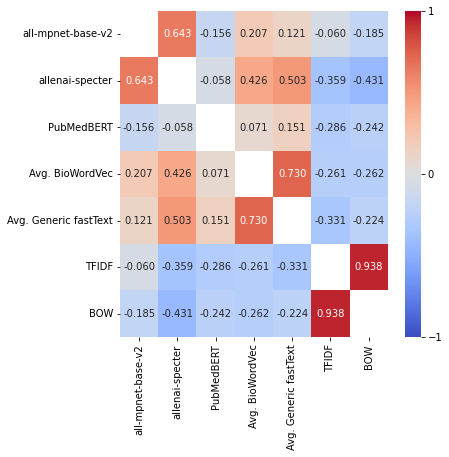

In [917]:
import numpy as np
import scipy.stats as st

#define sample data
# data = [[1,2,3],[2,1,2],[2,4,1]]


#create 95% confidence interval for population mean weight
a, b = st.t.interval(alpha=0.90, df=len(all_mat) - 1, loc=np.median(all_mat, axis=0), scale=st.sem(all_mat))
print(a)
print(b)

df2 = pd.DataFrame(a, columns=model_names)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df2, cmap="coolwarm", yticklabels=model_names, mask=np.triu(df2), annot=True, fmt='.3f',
            cbar_kws={'ticks': [-1, 0, 1]},
            cbar=True, vmin=-1, vmax=1)

df3 = pd.DataFrame(b, columns=model_names)

sns.heatmap(df3, cmap="coolwarm", yticklabels=model_names, annot=True, fmt='.3f',
            cbar_kws={'ticks': [-1, 0, 1]}, mask=np.tril(df3),
            cbar=False, vmin=-1, vmax=1)

<AxesSubplot:>

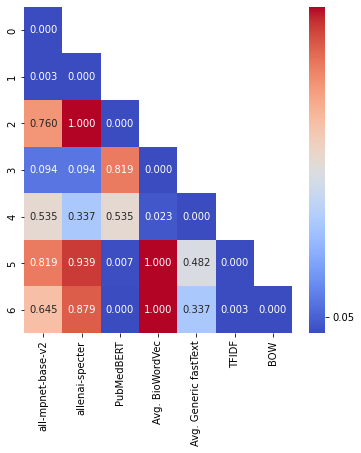

In [900]:
from scipy.stats import spearmanr

pvalues = []
main = []
R = R_mean
for i in range(len(model_names)):
    for j in range(len(model_names)):
        rho, pr = spearmanr(R[:, i], R[:, j])
        pvalues.append(pr)
        if j == len(model_names) - 1:
            main.append(pvalues)
            pvalues = []
df1 = pd.DataFrame(main, columns=model_names)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df1, cmap="coolwarm", mask=np.triu(df1), annot=True, fmt='.3f', cbar_kws={'ticks': [0.05]})


<AxesSubplot:>

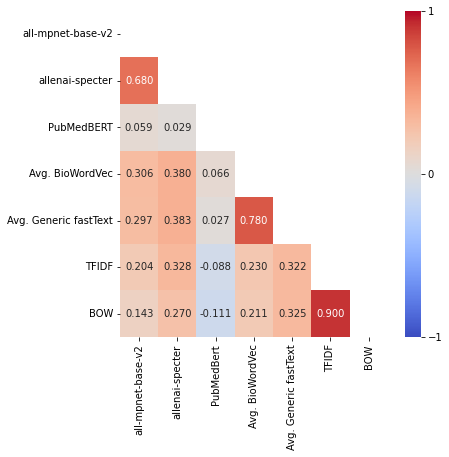

<AxesSubplot:>

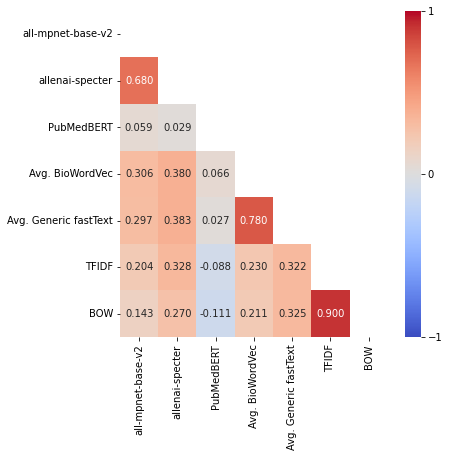

In [902]:
import pandas as pd

df = pd.DataFrame(R_mean, columns=['all-mpnet-base-v2', 'allenai-specter', 'PubMedBERT', 'Avg. BioWordVec',
                                   'Avg. Generic fastText', 'TFIDF', 'BOW'])
# my_r = df.corr(method="spearman")
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df, cmap="coolwarm", mask=np.triu(df), yticklabels=model_names, annot=df, fmt='.3f',
            cbar_kws={'ticks': [-1, 0, 1]}, cbar=True,
            vmin=-1,
            vmax=1)

/var/folders/l5/wmvcg4v54jj1mdfc17dxh5rr0000gq/T/ipykernel_53067/2985498648.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0.drop('target', axis=1, inplace=True)
/var/folders/l5/wmvcg4v54jj1mdfc17dxh5rr0000gq/T/ipykernel_53067/2985498648.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop('target', axis=1, inplace=True)


<AxesSubplot:>

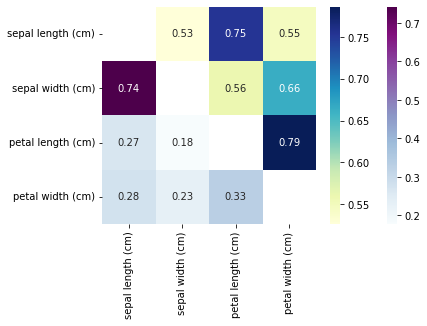

In [903]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

df_0.drop('target', axis=1, inplace=True)
df_1.drop('target', axis=1, inplace=True)

matrix_0 = np.triu(df_0.corr())
matrix_1 = np.tril(df_1.corr())

import seaborn as sns

sns.heatmap(df_0.corr(), annot=True, mask=matrix_0, cmap="BuPu")
sns.heatmap(df_1.corr(), annot=True, mask=matrix_1, cmap="YlGnBu")

In [488]:
import pandas as pd

# target_title1 = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# target_title2 = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
# article = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# A, B = draw_plot(article)

# draw_plot(target_title2)
models = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
          'Avg. Generic fastText', 'TFIDF', 'BOW']
model_names = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
               'Avg. Generic fastText', 'TFIDF', 'BOW']
rank_matrix = []
dist_matrix = []
count = 0
all_mat = []
all_dist_mat = []
# draw_plot(target_title3)
for article in article_titles:
    B = generate_rank_matrix(article, K=6, drawplot=False)
    df = pd.DataFrame(B)
    all_mat.append(df)

In [490]:
R = np.mean(np.array(all_mat), axis=0)
R

array([[ 0.        ,  6.57627119, 50.11016949, 21.18644068, 21.44915254,
        20.77118644, 27.6440678 ],
       [ 1.        ,  9.84745763, 57.63983051, 25.63559322, 27.14830508,
        30.79237288, 36.19915254],
       [ 2.        , 10.61864407, 62.84745763, 35.26271186, 34.51694915,
        35.43644068, 39.01694915],
       [ 3.        , 17.05508475, 73.52542373, 39.27966102, 37.26694915,
        39.78389831, 46.27542373],
       [ 4.        , 15.51271186, 67.19067797, 38.23305085, 40.28389831,
        37.52118644, 44.6059322 ],
       [ 6.22457627,  0.        , 50.45762712, 17.97881356, 19.34745763,
        16.88559322, 22.66949153],
       [ 9.37288136,  1.        , 57.70338983, 24.02542373, 26.12288136,
        25.44915254, 29.51271186],
       [13.18644068,  2.        , 60.97881356, 25.91949153, 25.86016949,
        23.63983051, 28.1440678 ],
       [14.8940678 ,  3.        , 60.98728814, 32.66949153, 32.59745763,
        32.28813559, 37.11016949],
       [16.99152542,  4.    

<AxesSubplot:>

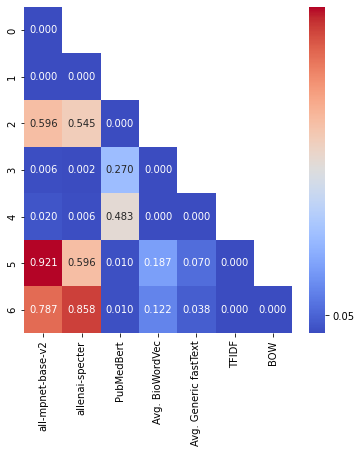

In [495]:
from scipy.stats import spearmanr

pvalues = []
main = []
for i in range(len(model_names)):
    for j in range(len(model_names)):
        rho, pr = spearmanr(R[:, i], R[:, j])
        pvalues.append(pr)
        if j == len(model_names) - 1:
            main.append(pvalues)
            pvalues = []
df1 = pd.DataFrame(main, columns=model_names)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df1, cmap="coolwarm", mask=np.triu(df1), annot=True, fmt='.3f', cbar_kws={'ticks': [0.05]})


<AxesSubplot:>

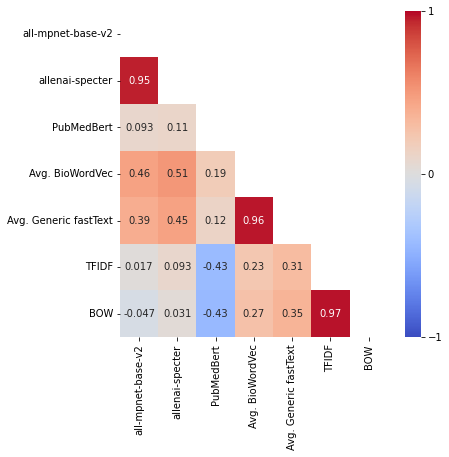

In [493]:
import pandas as pd

df = pd.DataFrame(R, columns=['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
                              'Avg. Generic fastText', 'TFIDF', 'BOW'])
my_r = df.corr(method="spearman")
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(my_r, cmap="coolwarm", mask=np.triu(my_r), annot=my_r, cbar_kws={'ticks': [-1, 0, 1]}, cbar=True, vmin=-1,
            vmax=1)